In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


# Logistic Regression Assignment Solution

## 1. Logistic Regression with 2 Features

1.1 Create your simulated dataset as a normal distribution.

In [197]:
np.random.seed(42)

num_samples = 40

# Class 0 data
x_1 = np.random.multivariate_normal([2, 2], [[1, .75],[.75, 1]], num_samples)
y_1 = np.zeros(num_samples)

# Class 1 data
x_2 = np.random.multivariate_normal([-1, -1], [[1, .75],[.75, 1]], num_samples)
y_2 = np.ones(num_samples)

# Combining the data
X = np.vstack((x_1, x_2))
y = np.hstack((y_1, y_2))
X = np.insert(X,0,np.ones(X.shape[0]),axis=1)

1.2 Plot to see the 2 classes in your dateset.

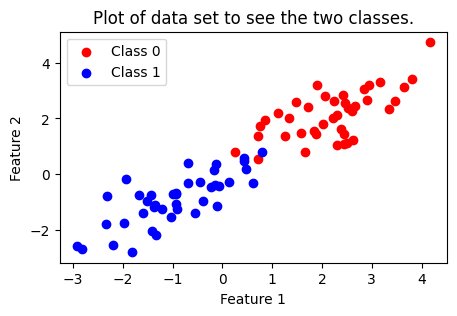

In [198]:
plt.figure(figsize=(5,3))
plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of data set to see the two classes.')
plt.legend()
plt.show()

1.3 Randomize initial values for theta. <font color='red'> Complete the initializeTheta() function and verify the results. </font>

In [199]:
def initializeTheta(X, random_seed):
  random.seed(random_seed)
  # Use random.random() to generate random numbers between -1 and +1. Return a numpy array of theta such that [ theta_0, theta_1, theta_2, ... , theta_n ]
  thetaArray = []
  row,columns = X.shape
  
  for _ in range(columns):
    thetaArray.append(2*random.random() - 1)
    
  return np.array(thetaArray)

In [200]:
expected_array = np.array([ 0.2788536 , -0.94997849, -0.44994136])
assert np.allclose( initializeTheta(X,42) , expected_array)

1.4 Write out the prediction function. <font color='red'> Complete the sigmoid() function and the prediction() function and verify the results. </font>

In [201]:
def sigmoid(z):
    # Write out the sigmoid function.
    return 1 / (1 + np.exp(-z))

def prediction(X, c, m1, m2):
  # Write out the prediction function.
  z = np.dot(X,np.array([c,m1,m2]).T)
  h = sigmoid(z)
  return h

In [202]:
initializeTheta(X, 42)

array([ 0.2788536 , -0.94997849, -0.44994136])

In [203]:
thetaArray = initializeTheta(X, 42)
theta0 = thetaArray[0]
theta1 = thetaArray[1]
theta2 = thetaArray[2]
h = prediction(X, theta0, theta1, theta2)
assert np.allclose(   h.sum() , 34.49833349468386  )

1.5 Write out the log loss function. <font color='red'> Complete the logLoss() function and verify the results. </font>

In [204]:
def logLoss(h,y):
  # Write out the log loss function and return the loss.
  rows = len(y)
  
  cost = []
  for row in range(rows):
    if y[row] == 1:
      cost.append( -np.log(h[row]))
    else:
      cost.append( -np.log(1 - h[row]))
      
  return np.mean(cost)

In [205]:
logLoss(h,y)

0.19866191835309335

In [206]:
assert np.allclose( logLoss(h,y) , 0.1986619183530933)

1.6 Write out the dJ/dTheta gradient calculation function. <font color='red'> Complete the gradients() function and verify the results. </font>

In [207]:
def gradients(X,y,h):
  # Calculate the gradient and return them as a numpy array [ dTheta_0, dTheta_1, ... , dTheta_n].  
  dThetas = (1/len(X)) * np.dot(X.T,(h - y))
  
  return dThetas
  

In [208]:
gradients(X,y,h)

array([-0.06877083,  0.09302227,  0.10442537])

In [209]:
dThetaArray = gradients(X,y,h)
expected_array = np.array([-0.06877083,  0.09302227,  0.10442537])
assert np.allclose( dThetaArray , expected_array)

1.7 Update the gradients. <font color='red'> Complete the updateTheta() function and verify the results. </font>

In [210]:
def updateTheta(X, thetaArray, dThetaArray, learning_rate):
  # Calculate the new values for theta and return them as a numpy array [theta_0, theta_1, ... , theta_n].
  return thetaArray - learning_rate * dThetaArray

In [211]:
updateTheta(X, thetaArray, dThetaArray, 0.01)

array([ 0.27954131, -0.95090871, -0.45098562])

In [212]:
theta_updated = updateTheta(X, thetaArray, dThetaArray, 0.01)
expected_array = np.array([ 0.27954131, -0.95090871, -0.45098562])
assert np.allclose( theta_updated , expected_array)

In [213]:
print(thetaArray)
print(dThetaArray)

[ 0.2788536  -0.94997849 -0.44994136]
[-0.06877083  0.09302227  0.10442537]


1.8 Putting it all together. <font color='red'> Complete the runLogisticRegression_2Features() function and verify the results. </font>

In [214]:
def runLogisticRegression_2Features(X,y,iterations, learning_rate):
  # Complete this function here to run logistic regression using the functions you have previously created.
  # Return the values of the final model loss and theta array
  thetaArray = initializeTheta(X, 42)
  theta0 = thetaArray[0]
  theta1 = thetaArray[1]
  theta2 = thetaArray[2]
  h = prediction(X, theta0, theta1, theta2)

  for _ in range(iterations):
    h = prediction(X, theta0, theta1, theta2)
    dThetaArray = gradients(X,y,h)
    thetaArray = updateTheta(X, thetaArray, dThetaArray, learning_rate)
    
    theta0 = thetaArray[0]
    theta1 = thetaArray[1]
    theta2 = thetaArray[2]
    
  loss = logLoss(h,y)
    
    
  return loss, thetaArray

In [215]:
loss, thetaArray = runLogisticRegression_2Features(X,y,100, 0.01)
print(loss)
print(thetaArray)

0.1792548255021849
[ 0.34627922 -1.03070157 -0.54178807]


In [216]:
loss, thetaArray = runLogisticRegression_2Features(X,y,100, 0.01)
assert np.allclose( loss , 0.17925482550218486 )

1.9 Plot the results. <font color='red'> To plot the result including the decision boundary you have to complete the calFeature2Values() function and verify the results. </font>

In [217]:
def calFeature2Values(x_values, c, m1, m2):
  # Calculate the feature2_val and return it
  feature2_val = -(m1* x_values +c)/ m2
  return feature2_val

def plotResult2D( x_1,x_2, c,m1,m2):
  plt.figure(figsize=(5,3))
  plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
  plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')

  # Decision boundary
  x_values = np.linspace(-4, 4, 100)
  y_values = calFeature2Values(x_values, c, m1, m2)
  plt.plot(x_values, y_values, label='Decision Boundary', color='green')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Logistic Regression using Gradient Descent')
  plt.legend()
  plt.show()

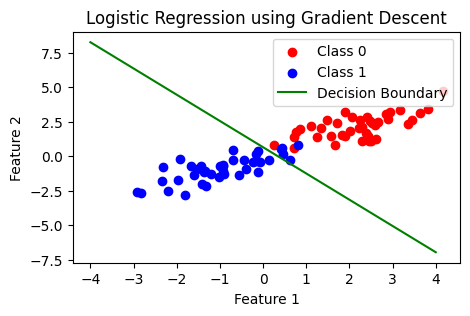

In [218]:
plotResult2D(x_1, x_2, thetaArray[0], thetaArray[1], thetaArray[2])

## 2. Logistic Regression Multiple Features

2.1 Prepare the data. We will just use the same data as before but this time we will pad a set of ones to the matrix. <font color='red'> Modify the X matrix so that it is in a suitable format for matrix formulation with n features. </font>

In [219]:
# Use the same data as before but pad ones to the X matrix
np.random.seed(42)

num_samples = 40

# Class 0 data
x_1 = np.random.multivariate_normal([2, 2], [[1, .75],[.75, 1]], num_samples)
y_1 = np.zeros(num_samples)

# Class 1 data
x_2 = np.random.multivariate_normal([-1, -1], [[1, .75],[.75, 1]], num_samples)
y_2 = np.ones(num_samples)

# Combining the data
X = np.vstack((x_1, x_2))
y = np.hstack((y_1, y_2))

# Modify your X and overwrite the result.
X = np.insert(X,0,np.ones(X.shape[0]),axis=1)

In [220]:
assert X[:,0].mean() == 1

2.2 Initialize theta but this time we will alter the code slightly to account for the differnt X. <font color='red'> Complete the initializeTheta_nFeatures() function and verify the results. </font>

In [221]:
def initializeTheta_nFeatures(X, random_seed):
  random.seed(random_seed)
  # Calculate random values for theta array between -1 and +1. Use random.random()
  # Return theta valuese in a numpy array of format [ theta_0, theta_1, ... , theta_n ]
  thetaArray = []
  _,columns = X.shape
  
  for _ in range(columns):
    thetaArray.append(2*random.random() - 1)
                      
  return thetaArray

In [222]:
initializeTheta_nFeatures(X,42)

[0.2788535969157675, -0.9499784895546661, -0.4499413632617615]

In [223]:
thetaArray = initializeTheta_nFeatures(X,42)
expected_array = np.array([ 0.2788536 , -0.94997849, -0.44994136])
assert np.allclose( thetaArray , expected_array)

2.3 Make prediction using matrix multiplication. <font color='red'> Complete the prediction_nFeatures() function and verify the results. </font>

In [224]:
def prediction_nFeatures(X, thetaArray):
  # Write prediction function using matrix operations.
  z = np.dot(X,thetaArray)
  h = sigmoid(z)
  return h

In [225]:
h = prediction_nFeatures(X, thetaArray)
assert np.allclose( h.sum() , 34.49833349468386 )

2.4 Calculate and verify the loss.

In [226]:
loss = logLoss(h,y)
assert np.allclose( loss , 0.19866191835309333 )

2.5 Calculate the gradients. <font color='red'> Complete the gradients_nFeatures() function and verify the results. </font>

In [227]:
def gradients_nFeatures(X,y,h):
  # Write gradients function using matrix operations.
  dThetas = (1/len(X)) * np.dot(X.T,(h - y))
  return dThetas

In [228]:
gradients_nFeatures(X,y,h)

array([-0.06877083,  0.09302227,  0.10442537])

In [229]:
dThetaArray = gradients_nFeatures(X,y,h)
expected_array = np.array([-0.06877083,  0.09302227,  0.10442537])
assert np.allclose( dThetaArray , expected_array)

2.6 Do gradient descent by updating the thetas and verify the results.

In [230]:
learning_rate = 0.01
theta_updated = updateTheta(X, thetaArray, dThetaArray, learning_rate)
expected_array = np.array([ 0.27954131, -0.95090871, -0.45098562])
assert np.allclose( theta_updated , expected_array)

2.8 Put it all together. <font color='red'> Complete the runLogisticRegression_nFeatures() function and verify the results. </font>

In [231]:
print(X.shape)
print(y.shape)
print(X)
type(y)

(80, 3)
(80,)
[[ 1.          1.58425027  1.48648264]
 [ 1.          0.85567048  1.93261522]
 [ 1.          2.30181034  2.13625051]
 [ 1.          0.25145253  0.79411083]
 [ 1.          2.24732913  2.63097702]
 [ 1.          2.59814789  2.26882722]
 [ 1.          2.45011174  1.0972183 ]
 [ 1.          3.81231155  3.41471422]
 [ 1.          2.83631355  3.05851997]
 [ 1.          3.34870351  2.35005399]
 [ 1.          0.70883509  0.54918714]
 [ 1.          2.4405577   1.4331086 ]
 [ 1.          2.47000635  2.54844047]
 [ 1.          2.9438266   3.20948521]
 [ 1.          2.66497536  2.45871673]
 [ 1.          1.90796577  3.21772423]
 [ 1.          2.38658278  1.63866821]
 [ 1.          1.6622131   0.79894628]
 [ 1.          2.49747401  1.11177798]
 [ 1.          3.17280333  3.31200524]
 [ 1.          1.24863993  1.3698156 ]
 [ 1.          2.2146353   2.00172283]
 [ 1.          3.63753404  3.12852732]
 [ 1.          2.05713897  2.80463726]
 [ 1.          2.30190335  1.0552457 ]
 [ 1.      

numpy.ndarray

In [232]:
def runLogisticRegression_nFeatures(X,y,iterations, learning_rate):
  # Complete this function here to run logistic regression using the functions you have previously created.
  # Return the values of the final model loss and theta array
  thetaArray = initializeTheta_nFeatures(X,42)
  h = prediction_nFeatures(X, thetaArray)
  
  for _ in range(iterations):
    h = prediction_nFeatures(X, thetaArray)
    dThetaArray = gradients_nFeatures(X,y,h)
    thetaArray = updateTheta(X, thetaArray, dThetaArray, learning_rate)
    
  loss = logLoss(h,y)
  
  return loss, thetaArray

In [233]:
print(runLogisticRegression_nFeatures(X,y, 100, 0.01))

(0.1792548255021849, array([ 0.34627922, -1.03070157, -0.54178807]))


In [234]:
loss, thetaArray = runLogisticRegression_nFeatures(X,y, 100, 0.01)
assert np.allclose( loss,  0.17925482550218486 )

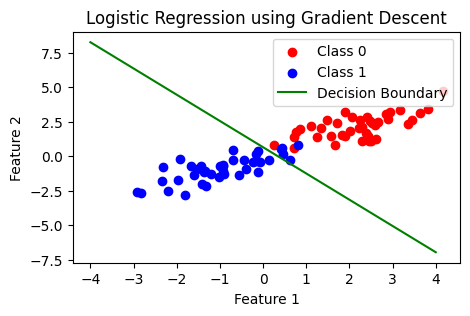

In [235]:
plotResult2D(x_1, x_2, thetaArray[0], thetaArray[1], thetaArray[2])

## 3. Logistic Regression with Advertisment Click Binary Classification

In [236]:
# Download CSV file from this link https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad/data

3.1 Load your data set into a pandas data frame.

In [237]:
df = pd.read_csv('advertising.csv')

In [238]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


3.2 Normalize the data by scaling it to standard deviation of 1. <font color='red'> Complete the normalize() function and verify the results. Do not use any other libray to help other than pandas. </font>

In [239]:
def normalize(df_column):
  # Write the function that normalizes a column of a pandas dataframe
  # We want to normalize the column such that it has a resulting standard deviation of 1
  # return the scaled dataframe column
  
  return (df_column - df_column.mean())/df_column.std()

In [240]:
df[['Daily Time Spent on Site']] = normalize( df[['Daily Time Spent on Site']] )
df[['Age']] = normalize( df[['Age']] )
df[['Area Income']] = normalize( df[['Area Income']] )
df[['Daily Internet Usage']] = normalize( df[['Daily Internet Usage']] )

In [241]:
assert df['Daily Time Spent on Site'].std() == 1
assert df['Age'].std() == 1
assert df['Area Income'].std() == 1
assert df['Daily Internet Usage'].std() == 1

3.3 Prepare the test and train dataset. Choose wisely which columns to the model train on. <font color='red'> Your task is to train the model such that accuracy > 0.7 in both the train and test data set. </font>

In [242]:
from sklearn.model_selection import train_test_split

y = df[['Clicked on Ad']]
X = df.drop(columns=['Clicked on Ad','Ad Topic Line','City','Country','Timestamp'])

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
X = df_X_train.to_numpy()
y = df_y_train.to_numpy()
y = y.reshape(-1)

In [244]:
X

array([[ 0.695097  , -1.59454791, -0.65749316,  0.6792326 ,  0.        ],
       [ 0.86792825, -0.45631684,  1.11913824,  0.63823251,  1.        ],
       [ 0.53551195,  0.22662181,  0.90441975,  1.46301771,  0.        ],
       ...,
       [ 1.66333046,  1.02338356, -0.22956348,  0.06035897,  1.        ],
       [-0.52607561,  0.68191423,  1.31829462, -0.9243266 ,  0.        ],
       [ 1.5712379 ,  0.45426802,  0.34242902,  0.32412624,  0.        ]])

In [245]:
X = np.hstack((np.ones(( len(X), 1)), X))

In [246]:
X

array([[ 1.        ,  0.695097  , -1.59454791, -0.65749316,  0.6792326 ,
         0.        ],
       [ 1.        ,  0.86792825, -0.45631684,  1.11913824,  0.63823251,
         1.        ],
       [ 1.        ,  0.53551195,  0.22662181,  0.90441975,  1.46301771,
         0.        ],
       ...,
       [ 1.        ,  1.66333046,  1.02338356, -0.22956348,  0.06035897,
         1.        ],
       [ 1.        , -0.52607561,  0.68191423,  1.31829462, -0.9243266 ,
         0.        ],
       [ 1.        ,  1.5712379 ,  0.45426802,  0.34242902,  0.32412624,
         0.        ]])

3.4 Train the model. <font color='red'> Choose your training parameters. </font>

In [247]:
learning_rate = 0.001
iterations = 8000
loss, thetaArray = runLogisticRegression_nFeatures(X,y, iterations, learning_rate )

In [248]:
print(thetaArray)
print(loss)

[ 0.14056768 -1.55530632  0.41274277 -0.86275049 -0.83450892  0.12314879]
0.15933690410443835


3.5 Make predictions with train dataset.

In [249]:
h = prediction_nFeatures(X, thetaArray)

3.6 Find the prediction accuracy of the train data set. We will choose a threshold of 0.5 for our predictions meaning that predictions equal to or greater than 0.5 will be classed as a positive prediction. Otherwise the prediction is negative. <font color='red'> Complete the accuracy() function and verify your results. </font>

In [250]:
def accuracy(h,y):
  # accurcy is the percentage of predictions the model got correct
  # outputs the accuracy in decimals where by accuracy of 1 is 100% and 0 is 0%
  acc = []
  for i in range(len(h)):
    if h[i] >= 0.5 and y[i] == 1:
      acc.append(1)
    elif h[i] < 0.5 and y[i] == 0:
      acc.append(1)
    else:
      acc.append(0)
      
  return sum(acc)/len(acc)

In [251]:
h_temp = np.array([ 0.2, 0.4, 0.5, 0.6, 0.8, 0.9])
y_temp =  np.array([ 0, 0, 1, 0, 1, 0])
accuracy(h_temp, y_temp)

0.6666666666666666

In [252]:
# verify that your accuracy function is correct

h_temp = np.array([ 0.2, 0.4, 0.5, 0.6, 0.8, 0.9])
y_temp =  np.array([ 0, 0, 1, 0, 1, 0])
assert accuracy(h_temp, y_temp) == 2/3

<font color='red'> Make sure your model training set accuracy > 80%. </font>

In [253]:
accuracy(h,y)

0.955

In [254]:
# Verify that the model accuracy for the train dataset is greater than 80%

assert accuracy(h,y) > 0.8

3.7 Apply model on test data set and find the accuracy.

In [255]:
X = df_X_test.to_numpy()
y = df_y_test.to_numpy()

In [256]:
X = np.hstack((np.ones(( len(X), 1)), X))

In [257]:
h = prediction_nFeatures(X, thetaArray)

In [258]:
loss = logLoss(h,y)
loss

0.196841178183844

<font color='red'> Make sure your model testing set accuracy > 80%. </font>

In [259]:
accuracy(h,y)

0.925

In [260]:
# Verify that the model accuracy for the test dataset is greater than 80%

assert accuracy(h,y) > 0.8

Conclusion: The model performance is slightly worse off in the test dataset compared to the train dataset suggesting that the results are adequate.